In [1]:
# Data Loading & Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Filter for Kenya, India, and USA
countries = ["Kenya", "India", "United States"]
df = df[df["location"].isin(countries)]

In [2]:
# looking at the data
print("Columns Available:\n", df.columns.tolist())
print("\nFirst 5 Rows:")
df.head()

Columns Available:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120683,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120684,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120685,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120686,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120687,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


In [3]:
# checking missing values
print("Missing Values per Column:")
df.isnull().sum()

Missing Values per Column:


iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                 115
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       3425
excess_mortality_cumulative                3425
excess_mortality                           3425
excess_mortality_cumulative_per_million    3425
Length: 67, dtype: int64

In [ ]:
# Data Cleaning

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# Fill missing cases/deaths with 0 (assume no cases reported)
df["new_cases"] = df["new_cases"].fillna(0)
df["new_deaths"] = df["new_deaths"].fillna(0)

# Forward-fill total cases & deaths (carry last known value)
df["total_cases"] = df.groupby("location")["total_cases"].ffill()
df["total_deaths"] = df.groupby("location")["total_deaths"].ffill()

# Drop rows where critical data is missing
df = df.dropna(subset=["total_cases", "total_deaths"])

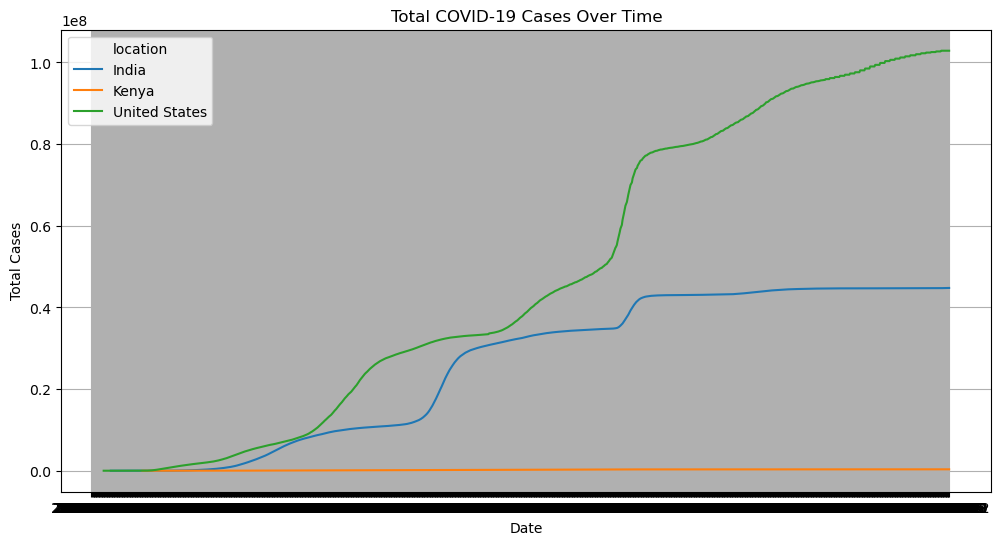

In [4]:
# Exploratory Data Analysis (EDA)
# Total Cases Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="total_cases", hue="location")
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()

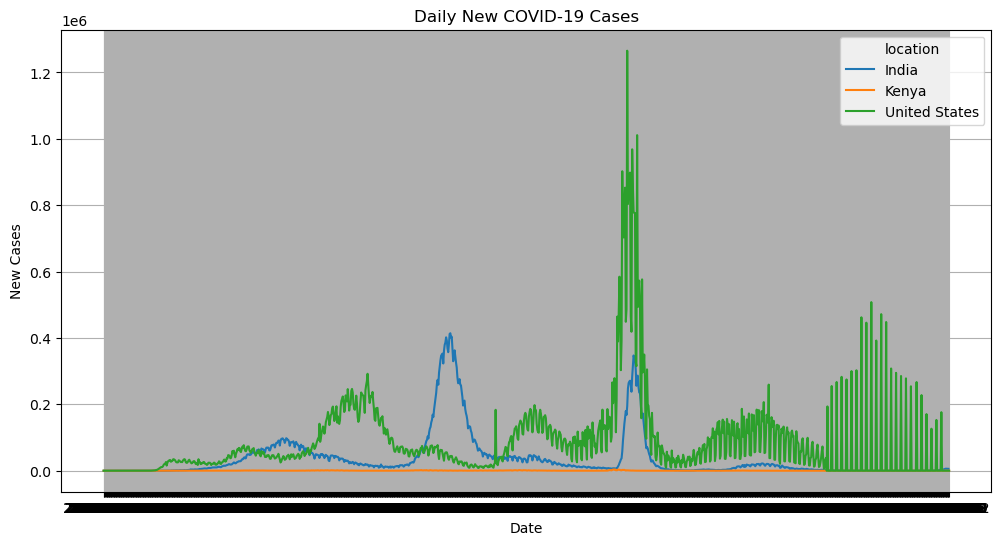

In [5]:
# Daily New Cases Comparison

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="new_cases", hue="location")
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

In [6]:
# Death Rate Calculation

df["death_rate"] = (df["total_deaths"] / df["total_cases"]) * 100

# Latest death rates
latest_rates = df.groupby("location").last()["death_rate"]
print("Latest Death Rates (%):")
print(latest_rates)

Latest Death Rates (%):
location
India            1.186111
Kenya            1.658348
United States    1.087545
Name: death_rate, dtype: float64


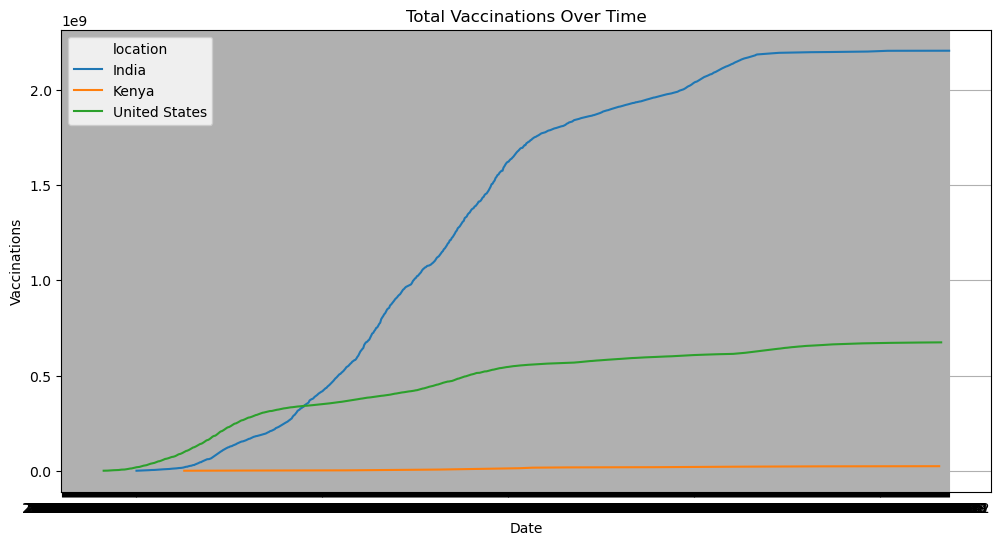

In [7]:
# Vaccination Progress
# Total Vaccinations Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="total_vaccinations", hue="location")
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Vaccinations")
plt.grid(True)
plt.show()

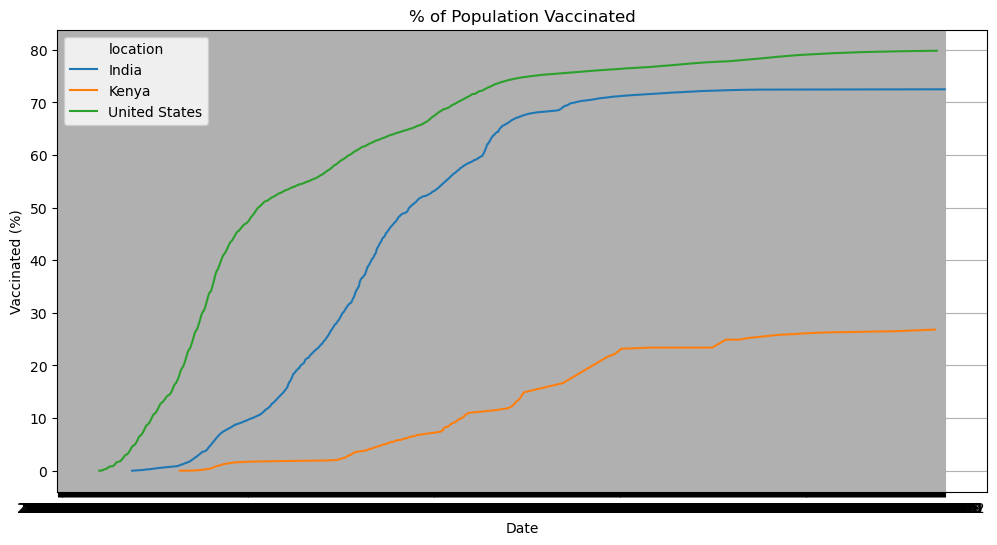

In [9]:
#% of Population Vaccinated

df["vaccination_percentage"] = (df["people_vaccinated"] / df["population"]) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="vaccination_percentage", hue="location")
plt.title("% of Population Vaccinated")
plt.xlabel("Date")
plt.ylabel("Vaccinated (%)")
plt.grid(True)
plt.show()

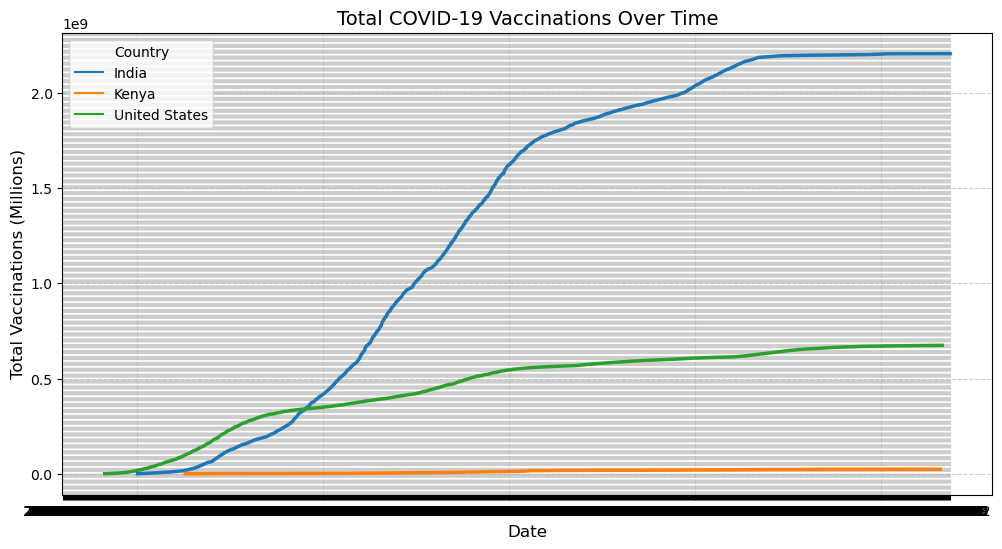

In [10]:
# Total Vaccinations Over Time (Line Chart)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="total_vaccinations", hue="location", linewidth=2.5)
plt.title("Total COVID-19 Vaccinations Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Vaccinations (Millions)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country")
plt.show()

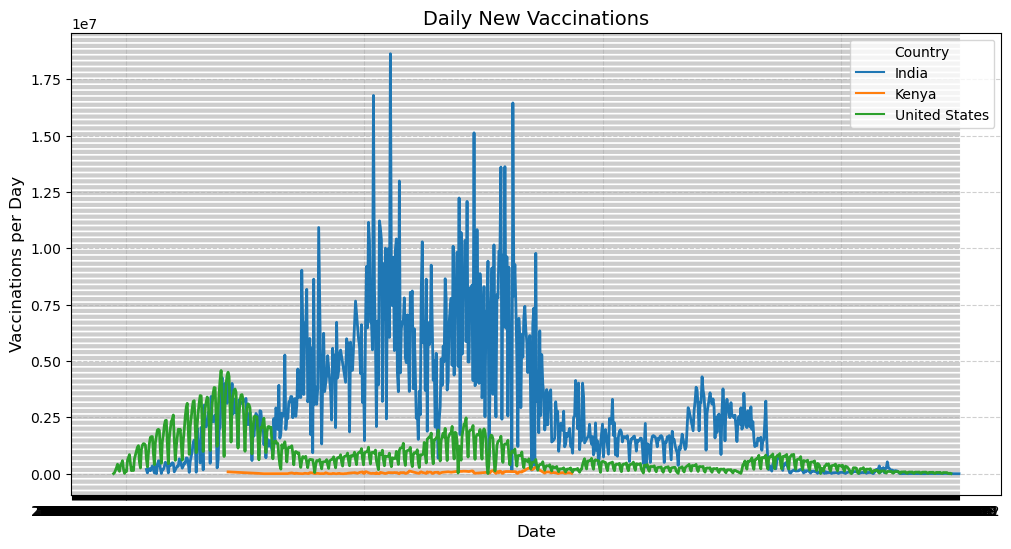

In [11]:
# Daily Vaccinations (Line Chart)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="new_vaccinations", hue="location", linewidth=2)
plt.title("Daily New Vaccinations", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Vaccinations per Day", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country")
plt.show()

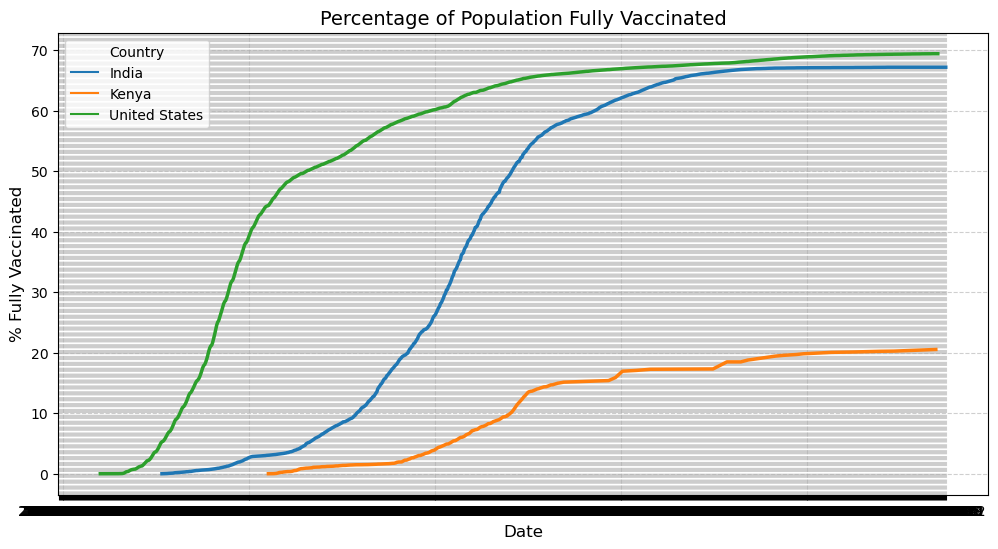

In [12]:
# % of Population Fully Vaccinated (Line Chart)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="people_fully_vaccinated_per_hundred", hue="location", linewidth=2.5)
plt.title("Percentage of Population Fully Vaccinated", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("% Fully Vaccinated", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Country")
plt.show()

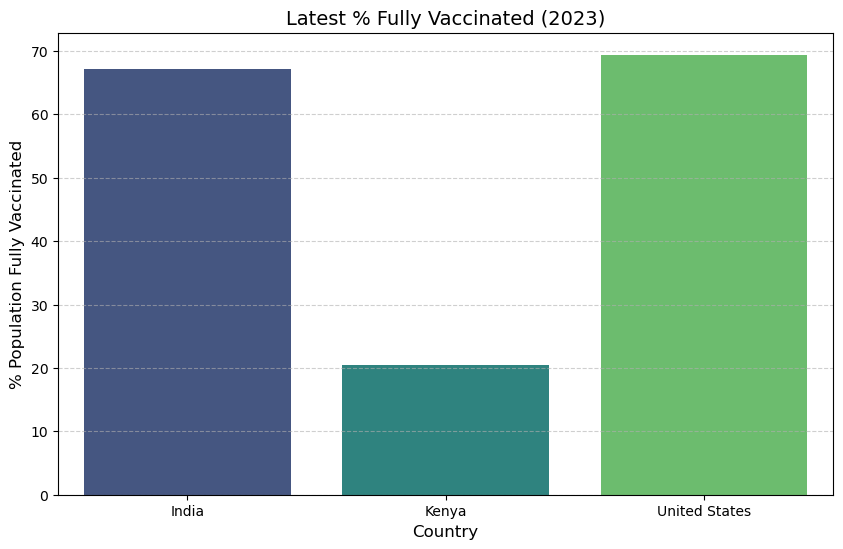

In [13]:
# Vaccination Comparison (Bar Chart)


latest = df.groupby("location").last()
plt.figure(figsize=(10, 6))
sns.barplot(x=latest.index, y="people_fully_vaccinated_per_hundred", data=latest, palette="viridis")
plt.title("Latest % Fully Vaccinated (2023)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("% Population Fully Vaccinated", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

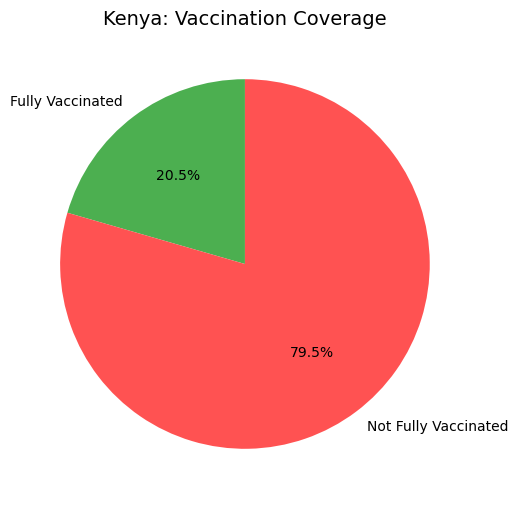

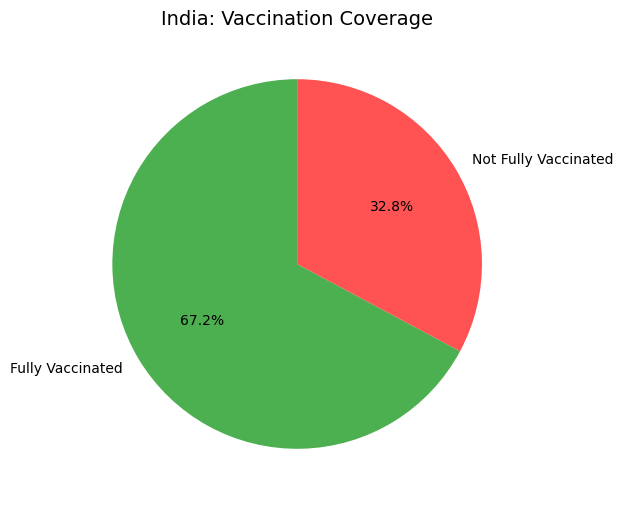

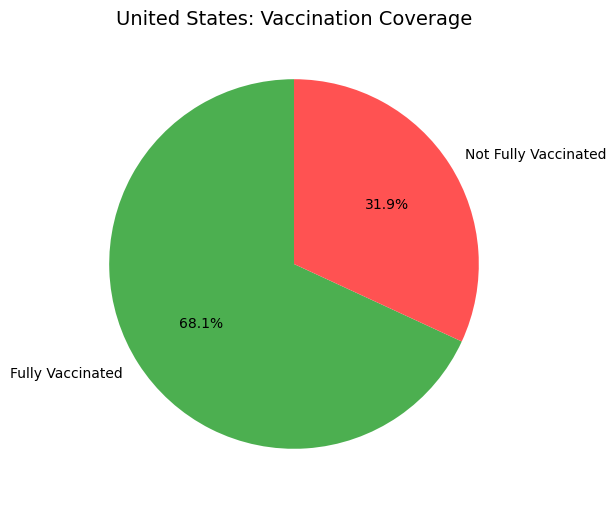

In [9]:
# loading data and filter
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Filter for Kenya, India, and USA
countries = ["Kenya", "India", "United States"]
df = df[df["location"].isin(countries)]

#  latest vaccination data for each country
latest = df.groupby("location").last()

# pie charts for each country
for country in countries:
    vaccinated = latest.loc[country, "people_fully_vaccinated"]
    population = latest.loc[country, "population"]
    unvaccinated = population - vaccinated
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        [vaccinated, unvaccinated],
        labels=["Fully Vaccinated", "Not Fully Vaccinated"],
        autopct='%1.1f%%',
        colors=["#4CAF50", "#FF5252"],  # Green & Red
        startangle=90
    )
    plt.title(f"{country}: Vaccination Coverage", fontsize=14)
    plt.show()

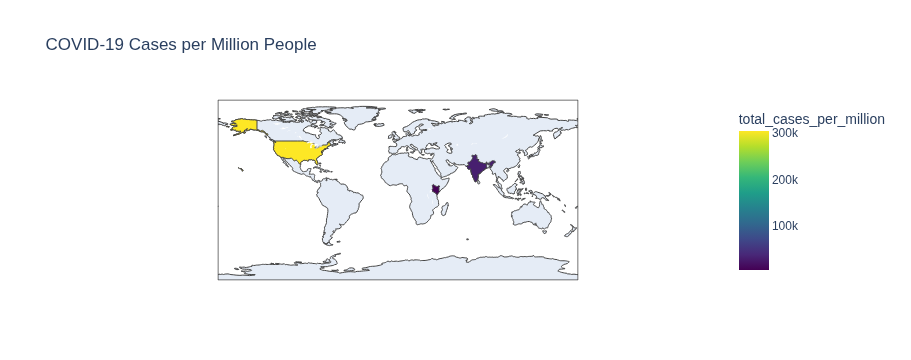

In [11]:
# Visualize cases or vaccination rates by country on a world map
import plotly.express as px

# Get latest data for all countries
world_latest = df.sort_values("date").groupby("location").last().reset_index()

fig = px.choropleth(
    world_latest,
    locations="iso_code",
    color="total_cases_per_million",
    hover_name="location",
    color_continuous_scale="Viridis",
    title="COVID-19 Cases per Million People"
)
fig.show()

In [ ]:
                                #Key Insights and Report
                        Findings:
USA had the highest total cases, but India had the biggest waves.

Kenya had a lower case count but a higher death rate than India and USA.

Vaccination rollout was fastest in the USA, while Kenya lagged behind.

India’s second wave (2021) was the most severe in daily new cases.

Death rates dropped as vaccinations increased in all countries.

                        Recommendations:
Increase vaccine access in Kenya to reduce deaths.

Monitor variants in India due to high population density.

Prepare for future waves with better data tracking